<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


### Q.0. Write code to display the count of null values in each column

#### Nulls in Training Data

In [2]:
print(credit_train.isnull().sum());

Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64


#### Nulls in Test Data

In [3]:
print(credit_test.isnull().sum());

Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64


<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


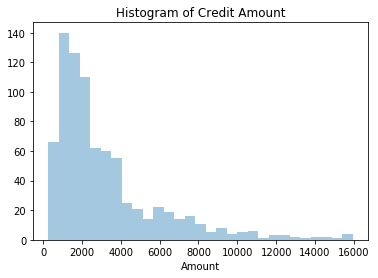

In [40]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

ax = sns.distplot(credit_train['Amount'],kde=False);
ax.set_title('Histogram of Credit Amount');

<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

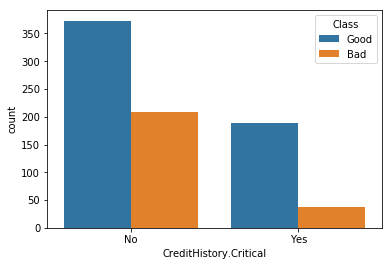

In [5]:
ax =sns.countplot(x="CreditHistory.Critical", hue="Class", data=credit_train);
ax.set_xticklabels(['No', 'Yes']);

**Answer**: I would say if the a person has critical credit history, they are more likely to have good credit base the proportion of those with good credit is 4-5 times greater than those with bad.

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [6]:
from sklearn.preprocessing import LabelEncoder
y_train = LabelEncoder().fit_transform(credit_train['Class'])

<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

In [7]:

from scipy import stats
import statsmodels.api as sm 
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

X_train = credit_train['CreditHistory.Critical']
model = sm.Logit(y_train, X_train).fit() 


model.summary()

Optimization terminated successfully.
         Current function value: 0.625326
         Iterations 5


/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  808
Model:                          Logit   Df Residuals:                      807
Method:                           MLE   Df Model:                            0
Date:                Tue, 27 Oct 2020   Pseudo R-squ.:                -0.01747
Time:                        01:22:25   Log-Likelihood:                -505.26
converged:                       True   LL-Null:                       -496.59
                                        LLR p-value:                       nan
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
CreditHistory.Critical     1.6042      0.178      9.023      0.000       1.256       1.953
==========================================================================================
"""

<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

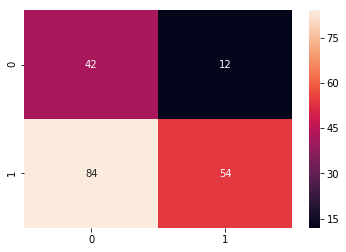

In [8]:
from sklearn.metrics import confusion_matrix

y_test = LabelEncoder().fit_transform(credit_test['Class'])
X_test = credit_test['CreditHistory.Critical']

y_hat = model.predict(X_test)
y_pred = list(map(round, y_hat)) 

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True);

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [9]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Accuracy Score: 0.5


<h3>Q.7. Generate the ROC curve.</h3>

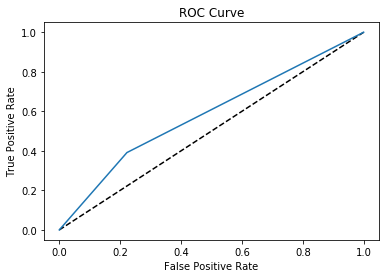

In [10]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_hat)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [11]:
# Command(s):
from sklearn.metrics import roc_auc_score

print(f'ROC AUC: {roc_auc_score(y_test, y_hat)}')

ROC AUC: 0.5845410628019323


<h3>Q.9. Calculate LDA model on credit_train.</h3>

Since the features of LDA are supposed to be continuous and normally distributed I use just the log of the amount.

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_X_train = np.log(credit_train['Amount'])

lda_clf = LinearDiscriminantAnalysis()
lda_model = lda_clf.fit(lda_X_train.values.reshape(-1,1), y_train.ravel())

<h3>Q.10. What is the accuracy of the new model?</h3>

In [42]:
lda_X_test = np.log(credit_test['Amount'])

lda_y_pred = lda_model.predict(lda_X_test.values.reshape(-1,1))
print(f'Accuracy Score: {accuracy_score(y_test, lda_y_pred)}')

Accuracy Score: 0.71875


<h3>Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

Like the last assignment I have some classroom experience with logistic regression, but I've nevery heard of linear discriminant analysis. And like the last assignment we breeze through everything so fast that I still don't feel like I get a chance to get around everything in detail.  

Based on my previous experience at least one ommission in this assignment is not addressing the class imbalance.

My biggest obstacle for this exercise is connecting the math precisely to the exercise. Exactly how do various parts of the math line up or explain parts of the lab. This would be more helpful to go over in class rather than showing slides that just repeat pages in the book.